In [11]:
import cv2
import pytesseract

import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)

4.12.0


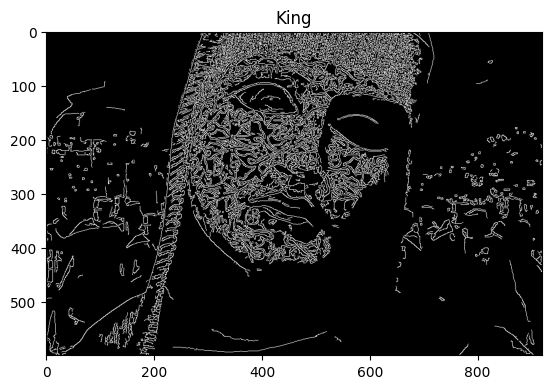

In [8]:
img = cv2.imread('images/king.jpg')

edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)
plt.figure()
plt.title('King')
plt.imsave('images/king-canny.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray');

In [10]:
image = cv2.imread('images/iphone_17.jpg')
cv2.waitKey(0)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)


contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 455


In [15]:
image_path = 'images/text.jpeg'
img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# (Опционально) Удаление шума (например, с помощью медианного размытия)
# denoised = cv2.medianBlur(gray, 3)

# (Опционально) Повышение резкости
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpened = cv2.filter2D(gray, -1, kernel)

# (Опционально) Бинаризация (например, с помощью порога или адаптивного порога)
# _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

preprocessed_img = gray

# 3. Использование pytesseract для извлечения текста
# tesseract может работать с OpenCV-изображениями (numpy arrays)
# Указание языка (например, 'eng' для английского, 'rus' для русского, 'eng+rus' для обоих)
# config = r'--oem 3 --psm 6 -l eng' # Пример конфигурации
# extracted_text = pytesseract.image_to_string(preprocessed_img, config=config)

extracted_text = pytesseract.image_to_string(preprocessed_img, config = r'--oem 3 --psm 6 -l eng')

print("Извлеченный текст:")
print(extracted_text)

cv2.imshow('Original Image', img)
cv2.imshow('Grayscale (Preprocessed)', preprocessed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Извлеченный текст:
Best.
Summer.
Ever.

